In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
from collections import Counter
import datetime

In [3]:
path=Path('/opt/data/john_hopkins/COVID-19/csse_covid_19_data')
assert path.exists()

In [4]:
!ls -la {path}

total 392
drwxr-xr-x 5 root root   4096 May 19 08:42 .
drwxr-xr-x 6 root root   4096 May 19 08:42 ..
drwxr-xr-x 2 root root   4096 May 19 08:42 csse_covid_19_daily_reports
drwxr-xr-x 2 root root   4096 May 19 08:42 csse_covid_19_daily_reports_us
drwxr-xr-x 2 root root   4096 May 19 08:42 csse_covid_19_time_series
-rw-r--r-- 1 root root  12523 May 19 08:42 README.md
-rw-r--r-- 1 root root 361036 May 19 08:42 UID_ISO_FIPS_LookUp_Table.csv


In [5]:
!git -C {path} remote -v
!git -C {path} pull

origin	https://github.com/CSSEGISandData/COVID-19.git (fetch)
origin	https://github.com/CSSEGISandData/COVID-19.git (push)
Already up-to-date.


In [6]:
!ls -la {path/'csse_covid_19_daily_reports'}

total 18672
drwxr-xr-x 2 root root   4096 May 19 08:42 .
drwxr-xr-x 5 root root   4096 May 19 08:42 ..
-rwxr-xr-x 1 root root   1675 May 18 11:36 01-22-2020.csv
-rwxr-xr-x 1 root root   1832 May 18 11:36 01-23-2020.csv
-rwxr-xr-x 1 root root   1695 May 18 11:36 01-24-2020.csv
-rwxr-xr-x 1 root root   1790 May 18 11:36 01-25-2020.csv
-rwxr-xr-x 1 root root   1896 May 18 11:36 01-26-2020.csv
-rwxr-xr-x 1 root root   2049 May 18 11:36 01-27-2020.csv
-rwxr-xr-x 1 root root   2102 May 18 11:36 01-28-2020.csv
-rwxr-xr-x 1 root root   2184 May 18 11:36 01-29-2020.csv
-rwxr-xr-x 1 root root   2334 May 18 11:36 01-30-2020.csv
-rwxr-xr-x 1 root root   2569 May 18 11:36 01-31-2020.csv
-rwxr-xr-x 1 root root   2785 May 18 11:36 02-01-2020.csv
-rwxr-xr-x 1 root root   3151 May 18 11:36 02-02-2020.csv
-rwxr-xr-x 1 root root   3201 May 18 11:36 02-03-2020.csv
-rwxr-xr-x 1 root root   3295 May 18 11:36 02-04-2020.csv
-rwxr-xr-x 1 root root   3341 May 18 11:36 02-05-2020.csv
-rwxr-xr-x 1 root root   33

In [7]:
last_day = pd.read_csv(path/'csse_covid_19_daily_reports/05-17-2020.csv')

In [8]:
last_day

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-18 02:32:21,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-18 02:32:21,30.295065,-92.414197,198,12,0,186,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-18 02:32:21,37.767072,-75.632346,688,9,0,679,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-18 02:32:21,43.452658,-116.241552,773,22,0,751,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-18 02:32:21,41.330756,-94.471059,5,0,0,5,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3302,NaN,NaN,NaN,West Bank and Gaza,2020-05-18 02:32:21,31.952200,35.233200,381,2,335,44,West Bank and Gaza
3303,NaN,NaN,NaN,Western Sahara,2020-05-18 02:32:21,24.215500,-12.885800,6,0,6,0,Western Sahara
3304,NaN,NaN,NaN,Yemen,2020-05-18 02:32:21,15.552727,48.516388,128,20,1,107,Yemen
3305,NaN,NaN,NaN,Zambia,2020-05-18 02:32:21,-13.133897,27.849332,753,7,188,558,Zambia


In [9]:
last_day['Country_Region'].unique()

array(['US', 'Italy', 'Canada', 'Spain', 'United Kingdom', 'China',
       'Netherlands', 'Australia', 'Germany', 'Denmark', 'France',
       'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Chile', 'Colombia', 'Comoros', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Diamond Princess', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia',
  

In [10]:
len(last_day['Country_Region'].unique())

188

In [11]:
!ls {path}

csse_covid_19_daily_reports	README.md
csse_covid_19_daily_reports_us	UID_ISO_FIPS_LookUp_Table.csv
csse_covid_19_time_series


Extract meaningful columns and concatenate all csv files

In [12]:
full_data_set = None
col_counter = Counter()
for i, p in enumerate(Path(path/'csse_covid_19_daily_reports').rglob('*.csv')):
    df = pd.read_csv(p)
    df.rename(columns={'Country/Region': 'Country_Region', 'Last Update': 'Last_Update'}, inplace=True)
    col_counter.update(df.columns)
    cleansed_df = df[['Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered']]
    if full_data_set is None:
        full_data_set = cleansed_df
    else:
        full_data_set = pd.concat([full_data_set, cleansed_df], axis=0, sort=False)

print(f'There are {i + 1} items', len(full_data_set))

There are 118 items 188389


In [13]:
col_counter

Counter({'Province/State': 60,
         'Country_Region': 118,
         'Last_Update': 118,
         'Confirmed': 118,
         'Deaths': 118,
         'Recovered': 118,
         'FIPS': 58,
         'Admin2': 58,
         'Province_State': 58,
         'Lat': 58,
         'Long_': 58,
         'Active': 58,
         'Combined_Key': 58,
         'Latitude': 21,
         'Longitude': 21})

In [14]:
len(full_data_set.Country_Region.unique()), len(full_data_set.Last_Update.unique())

(238, 2528)

Date conversion

In [15]:
full_data_set["Last_Update"] = pd.to_datetime(full_data_set["Last_Update"])
full_data_set["Date"] = full_data_set["Last_Update"].dt.date

In [16]:
full_data_set[(full_data_set['Country_Region'] == 'US') & (full_data_set['Date'] == datetime.date(2020, 4, 22))]['Confirmed'].sum()

957825.0

In [17]:
full_data_set[full_data_set['Country_Region'].str.contains("Congo")]

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Date
2935,Congo (Brazzaville),2020-04-20 23:36:27,160.0,6.0,16.0,2020-04-20
2936,Congo (Kinshasa),2020-04-20 23:36:27,332.0,25.0,27.0,2020-04-20
54,Congo (Kinshasa),2020-03-11 20:00:00,2.0,0.0,0.0,2020-03-11
2998,Congo (Brazzaville),2020-04-28 02:30:32,200.0,6.0,19.0,2020-04-28
2999,Congo (Kinshasa),2020-04-28 02:30:32,459.0,28.0,50.0,2020-04-28
...,...,...,...,...,...,...
2974,Congo (Brazzaville),2020-04-25 06:30:33,200.0,6.0,19.0,2020-04-25
2975,Congo (Kinshasa),2020-04-25 06:30:33,394.0,25.0,48.0,2020-04-25
224,Congo (Kinshasa),2020-03-13 22:22:02,2.0,0.0,0.0,2020-03-13
240,Congo (Brazzaville),2020-03-16 14:38:45,1.0,0.0,0.0,2020-03-16


There are problems with synonyms in the datasets. Like e.g. 'Mainland China', 'China', 'Congo (Brazzaville)', 'Congo (Kinshasa)'

In [18]:
full_data_set[full_data_set['Country_Region'].str.contains("China")].sort_values(['Date'])

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Date
1,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN,2020-01-22
0,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,2020-01-22
2,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN,2020-01-22
3,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,2020-01-22
4,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,2020-01-22
...,...,...,...,...,...,...
3048,China,2020-05-19 02:32:18,653.0,0.0,653.0,2020-05-19
3046,China,2020-05-19 02:32:18,216.0,1.0,196.0,2020-05-19
3045,China,2020-05-19 02:32:18,1019.0,4.0,1015.0,2020-05-19
3103,China,2020-05-19 02:32:18,666.0,7.0,641.0,2020-05-19


In [19]:
full_data_set['Country_Region'] = full_data_set['Country_Region'].str.replace('Mainland China', 'China')
# full_data_set['Country_Region'] = full_data_set['Country_Region'].str.replace('Congo (Brazzaville)', 'Congo')
# full_data_set['Country_Region'] = full_data_set['Country_Region'].str.replace('Congo (Kinshasa)', 'Congo')

We are intterested in daily results and some countries are providing results multiple times a day.

In [20]:
full_data_set_grouped = full_data_set.groupby(['Country_Region', 'Date']).agg({
    'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum', 'Last_Update': 'last'})

In [21]:
full_data_set_grouped.reset_index(inplace=True)

In [22]:
full_data_set_grouped

,Country_Region,Date,Confirmed,Deaths,Recovered,Last_Update
0,Azerbaijan,2020-02-28,1.0,0.0,0.0,2020-02-28 15:03:26
1,Afghanistan,2020-02-24,13.0,0.0,0.0,2020-02-24 23:33:02
2,Afghanistan,2020-03-08,8.0,0.0,0.0,2020-03-08 04:53:03
3,Afghanistan,2020-03-10,5.0,0.0,0.0,2020-03-10 12:33:02
4,Afghanistan,2020-03-11,21.0,0.0,0.0,2020-03-11 10:13:12
...,...,...,...,...,...,...
12949,Zimbabwe,2020-05-17,42.0,4.0,13.0,2020-05-17 02:32:32
12950,Zimbabwe,2020-05-18,44.0,4.0,17.0,2020-05-18 02:32:21
12951,Zimbabwe,2020-05-19,46.0,4.0,18.0,2020-05-19 02:32:18
12952,occupied Palestinian territory,2020-03-10,25.0,0.0,0.0,2020-03-10 19:13:21


Change the type of the numeric fields

In [23]:
for c in ['Confirmed', 'Deaths', 'Recovered']:
    full_data_set_grouped[c] = full_data_set_grouped[c].astype('uint32')

Add the active cases columns

In [24]:
full_data_set_grouped.fillna(0, inplace=True)

In [25]:
full_data_set_grouped['Active'] = full_data_set_grouped['Confirmed'] - full_data_set_grouped['Deaths'] - full_data_set_grouped['Recovered']

Create percent changes on confirmed

In [56]:
full_data_set_grouped.sort_values(['Country_Region', 'Date'], inplace=True)

In [79]:
full_data_set_grouped['Confirmed_Pct'] = full_data_set_grouped.groupby(['Country_Region'])['Confirmed'].pct_change(7)

In [80]:
full_data_set_grouped[full_data_set_grouped['Country_Region'] == 'US']

,Country_Region,Date,Confirmed,Deaths,Recovered,Last_Update,Active,Confirmed_Pct
12031,US,2020-01-22,1,0,0,2020-01-22 17:00:00,1,NaN
12032,US,2020-01-23,1,0,0,2020-01-23 17:00:00,1,NaN
12033,US,2020-01-24,2,0,0,2020-01-24 17:00:00,2,NaN
12034,US,2020-01-25,2,0,0,2020-01-25 17:00:00,2,NaN
12035,US,2020-01-26,5,0,0,2020-01-26 16:00:00,5,NaN
...,...,...,...,...,...,...,...,...
12130,US,2020-05-15,1417774,85898,246414,2020-05-15 02:33:02,1085462,0.127882
12131,US,2020-05-16,1442824,87530,250747,2020-05-16 02:32:19,1104547,0.123757
12132,US,2020-05-17,1467820,88754,268376,2020-05-17 02:32:32,1110690,0.120858
12133,US,2020-05-18,1486757,89562,272265,2020-05-18 02:32:21,1124930,0.118485


In [81]:
full_data_set_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12954 entries, 0 to 12953
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country_Region  12954 non-null  object        
 1   Date            12954 non-null  object        
 2   Confirmed       12954 non-null  uint32        
 3   Deaths          12954 non-null  uint32        
 4   Recovered       12954 non-null  uint32        
 5   Last_Update     12954 non-null  datetime64[ns]
 6   Active          12954 non-null  uint32        
 7   Confirmed_Pct   11499 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2), uint32(4)
memory usage: 1.3+ MB


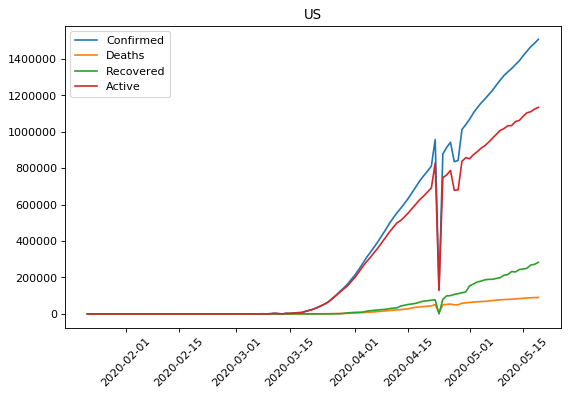

In [82]:
def plot_country(countries, fields=['Confirmed']):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 8
    fig_size[1] = 5
    fig, ax = plt.subplots(dpi=80)
    for country in countries:
        for field in fields:
            full_data_set_grouped_country = full_data_set_grouped[full_data_set_grouped['Country_Region'] == country]
            plt.plot(full_data_set_grouped_country['Date'], full_data_set_grouped_country[field], label=field)
    ax.legend();
    ax.set_title(','.join(countries))
    plt.xticks(rotation=45)
    return full_data_set_grouped_country
    
full_data_set_grouped_country = plot_country(['US'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

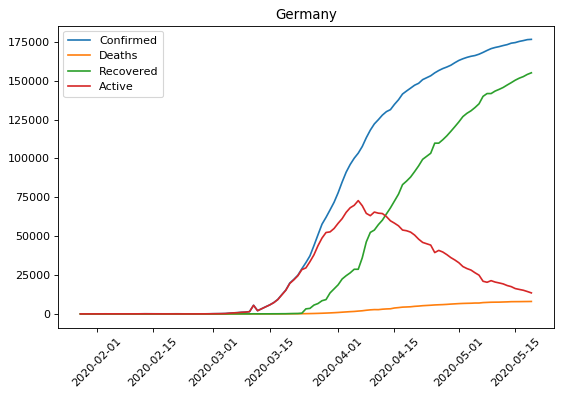

In [83]:
full_data_set_grouped_country = plot_country(['Germany'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

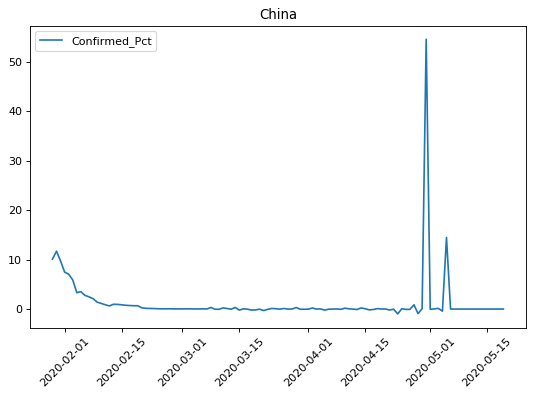

In [89]:
full_data_set_grouped_country = plot_country(['China'], ['Confirmed_Pct'])

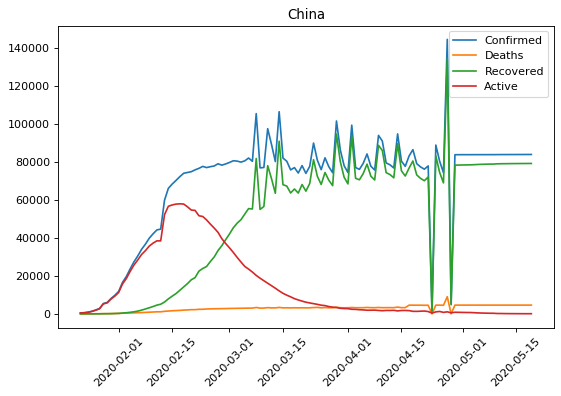

In [46]:
full_data_set_grouped_country = plot_country(['China'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

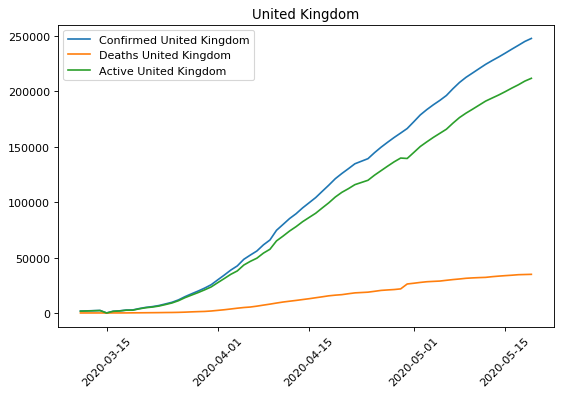

In [41]:
full_data_set_grouped_country = plot_country(['United Kingdom'], ['Confirmed', 'Deaths',  'Active'])

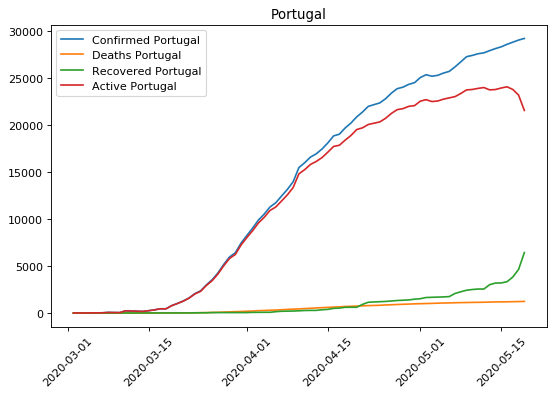

In [42]:
full_data_set_grouped_country = plot_country(['Portugal'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

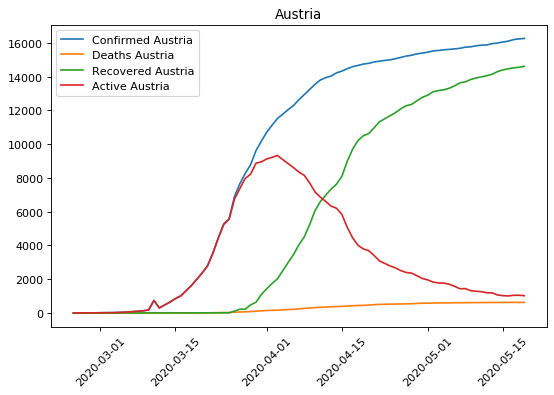

In [43]:
full_data_set_grouped_country = plot_country(['Austria'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

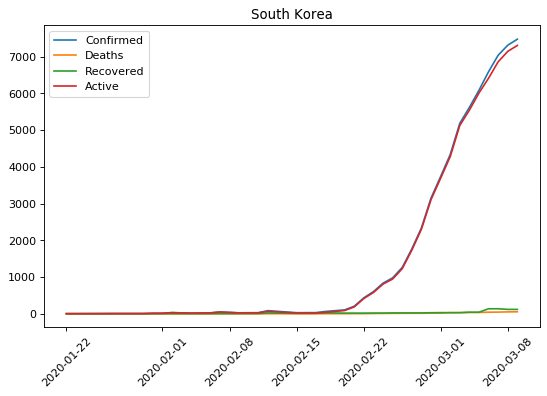

In [47]:
full_data_set_grouped_country = plot_country(['South Korea'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

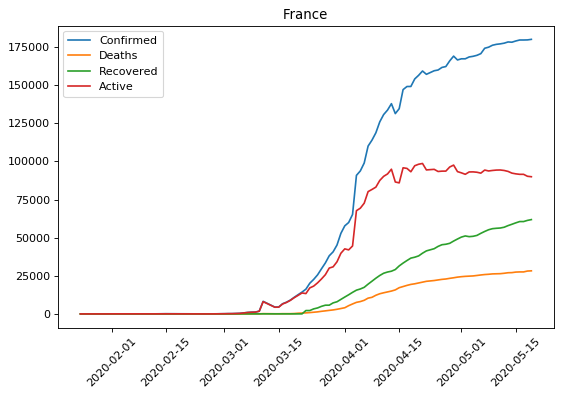

In [48]:
full_data_set_grouped_country = plot_country(['France'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

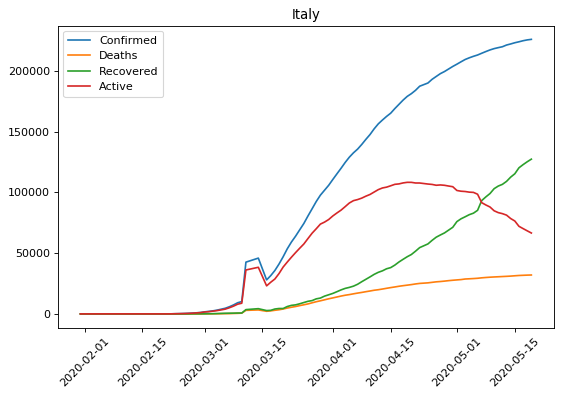

In [49]:
full_data_set_grouped_country = plot_country(['Italy'], ['Confirmed', 'Deaths', 'Recovered', 'Active'])

In [34]:
full_data_set_grouped_country.sort_values(['Date']).tail(40)

,Country_Region,Date,Confirmed,Deaths,Recovered,Last_Update,Active
686,Austria,2020-04-09,13244,295,5240,2020-04-09 23:02:19,7709
687,Austria,2020-04-10,13555,319,6064,2020-04-10 22:53:48,7172
688,Austria,2020-04-11,13806,337,6604,2020-04-11 22:45:13,6865
689,Austria,2020-04-12,13945,350,6987,2020-04-12 23:17:00,6608
690,Austria,2020-04-13,14041,368,7343,2020-04-13 23:07:34,6330
691,Austria,2020-04-14,14226,384,7633,2020-04-14 23:33:12,6209
692,Austria,2020-04-15,14336,393,8098,2020-04-15 22:56:32,5845
693,Austria,2020-04-16,14476,410,8986,2020-04-16 23:30:31,5080
694,Austria,2020-04-17,14595,431,9704,2020-04-17 23:30:32,4460
695,Austria,2020-04-18,14671,443,10214,2020-04-18 22:32:28,4014
